# Food Deserts in Northern CA
---

## ...

In [35]:
# Dependencies and Setup
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns
import matplotlib.patches as mpatches
from scipy.stats import pearsonr

In [11]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
food_deserts_usa = pd.read_csv("Resources/StateAndCountyData.csv")

# Display sample data
food_deserts_usa.head()

,FIPS,State,County,Variable_Code,Value
0,1001,AL,Autauga,LACCESS_POP10,18428.439690
1,1001,AL,Autauga,LACCESS_POP15,17496.693040
2,1001,AL,Autauga,PCH_LACCESS_POP_10_15,-5.056026
3,1001,AL,Autauga,PCT_LACCESS_POP10,33.769657
4,1001,AL,Autauga,PCT_LACCESS_POP15,32.062255


---

### Create Clean DataFrames for CA, The Bay Area, Greater Sacremento, and The Cental Valley.

In [12]:
#create a df that includes only the Counties in CA
food_deserts_ca = food_deserts_usa.loc[food_deserts_usa['State'] == 'CA']
del food_deserts_ca['State'] 

food_deserts_ca

,FIPS,County,Variable_Code,Value
7625,6001,Alameda,LACCESS_POP10,1.604249e+05
7626,6001,Alameda,LACCESS_POP15,1.079644e+05
7627,6001,Alameda,PCH_LACCESS_POP_10_15,-3.270098e+01
7628,6001,Alameda,PCT_LACCESS_POP10,1.062226e+01
7629,6001,Alameda,PCT_LACCESS_POP15,7.148677e+00
...,...,...,...,...
850873,6,Total,State_Population_2014,3.862514e+07
850874,6,Total,State_Population_2015,3.895314e+07
850875,6,Total,State_Population_2016,3.920913e+07
850876,6,Total,State_Population_2017,3.939935e+07


In [13]:
#Rotate the "Variable Codes" into the columns and then match them with the corresponding "Values" 
food_deserts_ca = food_deserts_ca.pivot_table(index='County', columns='Variable_Code', values='Value')
food_deserts_ca.head()

Variable_Code,AGRITRSM_OPS07,AGRITRSM_OPS12,AGRITRSM_RCT07,AGRITRSM_RCT12,BERRY_ACRES07,BERRY_ACRES12,BERRY_ACRESPTH07,BERRY_ACRESPTH12,BERRY_FARMS07,BERRY_FARMS12,...,WICS16,WICSPTH11,WICSPTH16,WIC_PART_2012,WIC_PART_2013,WIC_PART_2014,WIC_PART_2015,WIC_PART_2016,WIC_PART_2017,WIC_PART_2018
County,,,,,,,,,,,,,,,,,,,,,
Alameda,4.0,16.0,29000.0,196000.0,NaN,2.0,NaN,0.001285,1.0,8.0,...,145.0,0.116264,0.087862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alpine,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amador,5.0,13.0,NaN,1037000.0,NaN,2.0,NaN,0.053910,2.0,11.0,...,9.0,0.239757,0.240397,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Butte,22.0,38.0,287000.0,392000.0,65.0,84.0,0.298893,0.379738,33.0,34.0,...,23.0,0.131847,0.101532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Calaveras,6.0,20.0,116000.0,1493000.0,23.0,20.0,0.497104,0.446877,14.0,14.0,...,7.0,0.243578,0.154515,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 2: Narrow down the `food_deserts_ca` DataFrame to regions

In [15]:
bay_area_counties = ['Alameda', 'Contra Costa', 'Marin', 'Napa', 'San Francisco', 'San Mateo', 'Santa Clara', 'Solano', 'Sonoma']
bay_area_desert = food_deserts_ca.loc[bay_area_counties]

bay_area_desert

Variable_Code,AGRITRSM_OPS07,AGRITRSM_OPS12,AGRITRSM_RCT07,AGRITRSM_RCT12,BERRY_ACRES07,BERRY_ACRES12,BERRY_ACRESPTH07,BERRY_ACRESPTH12,BERRY_FARMS07,BERRY_FARMS12,...,WICS16,WICSPTH11,WICSPTH16,WIC_PART_2012,WIC_PART_2013,WIC_PART_2014,WIC_PART_2015,WIC_PART_2016,WIC_PART_2017,WIC_PART_2018
County,,,,,,,,,,,,,,,,,,,,,
Alameda,4.0,16.0,29000.0,196000.0,NaN,2.0,NaN,0.001285,1.0,8.0,...,145.0,0.116264,0.087862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contra Costa,13.0,33.0,487000.0,665000.0,27.0,19.0,0.026755,0.017604,13.0,22.0,...,95.0,0.114505,0.083539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marin,9.0,30.0,NaN,99000.0,4.0,10.0,0.016244,0.039059,9.0,15.0,...,16.0,0.078320,0.061389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Napa,29.0,119.0,1816000.0,23723000.0,15.0,13.0,0.113137,0.093488,8.0,13.0,...,18.0,0.166969,0.127492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
San Francisco,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,42.0,0.077236,0.048121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
San Mateo,7.0,8.0,977000.0,520000.0,NaN,39.0,NaN,0.052657,7.0,24.0,...,64.0,0.101592,0.083311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Santa Clara,17.0,57.0,1091000.0,642000.0,94.0,96.0,0.054906,0.052137,13.0,30.0,...,145.0,0.089396,0.075146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Solano,13.0,44.0,1742000.0,1557000.0,26.0,35.0,0.063688,0.083262,10.0,6.0,...,47.0,0.110496,0.106988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sonoma,46.0,135.0,1934000.0,3894000.0,125.0,159.0,0.267462,0.323997,58.0,97.0,...,55.0,0.139509,0.109290,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
sacramento_counties = ['Amador', 'Calaveras', 'El Dorado', 'Placer', 
                        'Sacramento', 'Yolo']
    
sacramento_desert = food_deserts_ca.loc[sacramento_counties]
sacramento_desert

Variable_Code,AGRITRSM_OPS07,AGRITRSM_OPS12,AGRITRSM_RCT07,AGRITRSM_RCT12,BERRY_ACRES07,BERRY_ACRES12,BERRY_ACRESPTH07,BERRY_ACRESPTH12,BERRY_FARMS07,BERRY_FARMS12,...,WICS16,WICSPTH11,WICSPTH16,WIC_PART_2012,WIC_PART_2013,WIC_PART_2014,WIC_PART_2015,WIC_PART_2016,WIC_PART_2017,WIC_PART_2018
County,,,,,,,,,,,,,,,,,,,,,
Amador,5.0,13.0,NaN,1037000.0,NaN,2.0,NaN,0.053910,2.0,11.0,...,9.0,0.239757,0.240397,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Calaveras,6.0,20.0,116000.0,1493000.0,23.0,20.0,0.497104,0.446877,14.0,14.0,...,7.0,0.243578,0.154515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
El Dorado,19.0,42.0,2539000.0,1146000.0,66.0,127.0,0.371425,0.703293,58.0,87.0,...,19.0,0.105020,0.102106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Placer,22.0,20.0,302000.0,72000.0,97.0,53.0,0.294812,0.146727,43.0,56.0,...,43.0,0.103842,0.113370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sacramento,18.0,45.0,435000.0,1137000.0,96.0,117.0,0.069507,0.080775,32.0,46.0,...,158.0,0.119966,0.104531,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yolo,20.0,23.0,361000.0,734000.0,55.0,60.0,0.283011,0.292550,16.0,22.0,...,27.0,0.158448,0.125273,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
central_valley_counties = ['Fresno', 'Kern', 'Kings', 
                            'Madera', 'Mariposa', 'Merced', 'San Joaquin', 
                            'Stanislaus', 'Tulare', 'Tuolumne']

central_valley_desert =  food_deserts_ca.loc[central_valley_counties]
central_valley_desert

Variable_Code,AGRITRSM_OPS07,AGRITRSM_OPS12,AGRITRSM_RCT07,AGRITRSM_RCT12,BERRY_ACRES07,BERRY_ACRES12,BERRY_ACRESPTH07,BERRY_ACRESPTH12,BERRY_FARMS07,BERRY_FARMS12,...,WICS16,WICSPTH11,WICSPTH16,WIC_PART_2012,WIC_PART_2013,WIC_PART_2014,WIC_PART_2015,WIC_PART_2016,WIC_PART_2017,WIC_PART_2018
County,,,,,,,,,,,,,,,,,,,,,
Fresno,15.0,39.0,442000.0,743000.0,559.0,603.0,0.623931,0.636269,43.0,43.0,...,216.0,0.301231,0.220869,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kern,11.0,27.0,594000.0,1091000.0,1112.0,1942.0,1.384323,2.267166,20.0,27.0,...,189.0,0.271182,0.214198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kings,0.0,8.0,0.0,46000.0,32.0,22.0,0.212738,0.145502,5.0,21.0,...,22.0,0.164597,0.147148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Madera,6.0,16.0,546000.0,986000.0,23.0,95.0,0.157462,0.624343,9.0,12.0,...,29.0,0.224124,0.188116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mariposa,6.0,12.0,17000.0,69000.0,NaN,NaN,NaN,NaN,2.0,7.0,...,1.0,0.110084,0.057290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merced,12.0,35.0,632000.0,405000.0,134.0,462.0,0.539149,1.764787,13.0,30.0,...,60.0,0.273779,0.223905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
San Joaquin,11.0,23.0,913000.0,427000.0,257.0,437.0,0.384684,0.622983,17.0,38.0,...,80.0,0.155533,0.109262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stanislaus,10.0,28.0,484000.0,134000.0,95.0,140.0,0.187069,0.268149,25.0,22.0,...,89.0,0.220241,0.164955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tulare,7.0,17.0,NaN,263000.0,512.0,596.0,1.212868,1.320869,34.0,64.0,...,87.0,0.221544,0.189121,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
regions_desert = pd.concat([central_valley_desert, sacramento_desert, bay_area_desert])
regions_desert

Variable_Code,AGRITRSM_OPS07,AGRITRSM_OPS12,AGRITRSM_RCT07,AGRITRSM_RCT12,BERRY_ACRES07,BERRY_ACRES12,BERRY_ACRESPTH07,BERRY_ACRESPTH12,BERRY_FARMS07,BERRY_FARMS12,...,WICS16,WICSPTH11,WICSPTH16,WIC_PART_2012,WIC_PART_2013,WIC_PART_2014,WIC_PART_2015,WIC_PART_2016,WIC_PART_2017,WIC_PART_2018
County,,,,,,,,,,,,,,,,,,,,,
Fresno,15.0,39.0,442000.0,743000.0,559.0,603.0,0.623931,0.636269,43.0,43.0,...,216.0,0.301231,0.220869,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kern,11.0,27.0,594000.0,1091000.0,1112.0,1942.0,1.384323,2.267166,20.0,27.0,...,189.0,0.271182,0.214198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kings,0.0,8.0,0.0,46000.0,32.0,22.0,0.212738,0.145502,5.0,21.0,...,22.0,0.164597,0.147148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Madera,6.0,16.0,546000.0,986000.0,23.0,95.0,0.157462,0.624343,9.0,12.0,...,29.0,0.224124,0.188116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mariposa,6.0,12.0,17000.0,69000.0,NaN,NaN,NaN,NaN,2.0,7.0,...,1.0,0.110084,0.057290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merced,12.0,35.0,632000.0,405000.0,134.0,462.0,0.539149,1.764787,13.0,30.0,...,60.0,0.273779,0.223905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
San Joaquin,11.0,23.0,913000.0,427000.0,257.0,437.0,0.384684,0.622983,17.0,38.0,...,80.0,0.155533,0.109262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stanislaus,10.0,28.0,484000.0,134000.0,95.0,140.0,0.187069,0.268149,25.0,22.0,...,89.0,0.220241,0.164955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tulare,7.0,17.0,NaN,263000.0,512.0,596.0,1.212868,1.320869,34.0,64.0,...,87.0,0.221544,0.189121,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#pull health data columns
health_data_columns = ['PCT_DIABETES_ADULTS08', 'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS12', 'PCT_OBESE_ADULTS17', 'PCT_HSPA17', 'RECFAC11', 'RECFAC16', 'PCH_RECFAC_11_16', 'RECFACPTH11', 'RECFACPTH16', 'PCH_RECFACPTH_11_16']
health_data = regions_desert[health_data_columns]
#rename health data columns
health_data = health_data.rename (columns = {
    'PCT_DIABETES_ADULTS08': 'Diabetes 2008',
    'PCT_DIABETES_ADULTS13': 'Diabetes 2013',
    'PCT_OBESE_ADULTS12': 'Obesity 2012',
    'PCT_OBESE_ADULTS17': 'Obesity 2017',
    'PCT_HSPA17': 'Physical Activity 2017',
    'RECFAC11': 'Recreation Facilities 2011',
    'RECFAC16': 'Recreation Facilities 2016',
    'PCH_RECFAC_11_16': 'Percent Change Recreation Facilities 2011-2016',
    'RECFACPTH11': 'Recreation Facilities Per-1000 2011',
    'RECFACPTH16': 'Recreation Facilities Per-1000 2016',
    'PCH_RECFACPTH_11_16': 'Percent Change Recreation Facilities Per-1000 2011_2016'
})


health_data_df = pd.DataFrame(health_data)
health_data_df.to_csv('health_data_df.csv', index_label="County")
health_data_df

Variable_Code,Diabetes 2008,Diabetes 2013,Obesity 2012,Obesity 2017,Physical Activity 2017,Recreation Facilities 2011,Recreation Facilities 2016,Percent Change Recreation Facilities 2011-2016,Recreation Facilities Per-1000 2011,Recreation Facilities Per-1000 2016,Percent Change Recreation Facilities Per-1000 2011_2016
County,,,,,,,,,,,
Fresno,8.5,9.4,25.0,25.1,27.5,39.0,62.0,58.974359,0.041474,0.063295,52.616579
Kern,7.0,9.3,25.0,25.1,27.5,41.0,48.0,17.073171,0.048305,0.054232,12.269140
Kings,5.7,7.5,25.0,25.1,27.5,11.0,7.0,-36.363636,0.072354,0.046730,-35.415019
Madera,7.8,7.9,25.0,25.1,27.5,7.0,8.0,14.285714,0.046090,0.051624,12.006873
Mariposa,8.3,10.7,25.0,25.1,27.5,2.0,2.0,0.000000,0.110047,0.114129,3.709199
Merced,7.5,9.2,25.0,25.1,27.5,13.0,19.0,46.153846,0.050076,0.070664,41.114414
San Joaquin,7.9,10.3,25.0,25.1,27.5,36.0,49.0,36.111111,0.051793,0.066731,28.840609
Stanislaus,8.1,9.7,25.0,25.1,27.5,38.0,42.0,10.526316,0.073354,0.077583,5.765350
Tulare,7.6,8.0,25.0,25.1,27.5,15.0,14.0,-6.666667,0.033530,0.030380,-9.396176


In [22]:
#pull socioeconomics columns and rename
socioeconomics_columns =['PCT_NHWHITE10', 
                         'PCT_NHBLACK10', 
                         'PCT_HISP10',
                        'PCT_NHASIAN10',
                        'PCT_NHNA10',
                        'PCT_NHPI10',
                        'PCT_65OLDER10',
                        'PCT_18YOUNGER10',
                        'MEDHHINC15',
                        'POVRATE15',
                        'PERPOV10',
                        'CHILDPOVRATE15',
                        'PERCHLDPOV10',
                        'METRO13',
                        'POPLOSS10']
socioeconomics_data = regions_desert[socioeconomics_columns]
socioeconomics_data = socioeconomics_data.rename (columns = {
                        'PCT_NHWHITE10':'% White 2010', 
                        'PCT_NHBLACK10':'% Black 2010', 
                        'PCT_HISP10':'% Hispanic 2010',
                            'PCT_NHASIAN10': '% Asian 2010',
                            'PCT_NHNA10': '% Native American 2010',
                            'PCT_NHPI10': '% Pacific Islander 2010',
                            'PCT_65OLDER10': '% Pop 65+ Years 2010',
                            'PCT_18YOUNGER10': '% Pop under 18 years 2010',
                            'MEDHHINC15': 'Median Household Income 2015',
                            'POVRATE15': 'Poverty Rate 2015',
                            'PERPOV10': 'Persistent Poverty Rate Counties 2010',
                            'CHILDPOVRATE15':'Child Poverty Rate 2015',
                            'PERCHLDPOV10': 'Persistent Child Poverty Counties 2010',
                            'METRO13':'Metro/Nonmetro Counties 2010',
                            'POPLOSS10': 'Population Loss Counties 2010'
})
socioeconomics_df = pd.DataFrame(socioeconomics_data)
socioeconomics_df.to_csv('socioeconomics_df.csv', index_label="County")
socioeconomics_df

Variable_Code,% White 2010,% Black 2010,% Hispanic 2010,% Asian 2010,% Native American 2010,% Pacific Islander 2010,% Pop 65+ Years 2010,% Pop under 18 years 2010,Median Household Income 2015,Poverty Rate 2015,Persistent Poverty Rate Counties 2010,Child Poverty Rate 2015,Persistent Child Poverty Counties 2010,Metro/Nonmetro Counties 2010,Population Loss Counties 2010
County,,,,,,,,,,,,,,,
Fresno,32.728465,4.836907,50.305766,9.334838,0.642592,0.114568,10.040411,29.825031,46608.0,25.2,0.0,36.3,1.0,1.0,0.0
Kern,38.563845,5.404398,49.192205,3.942208,0.701856,0.118504,8.984542,30.261031,51150.0,21.9,0.0,31.3,0.0,1.0,0.0
Kings,35.219176,6.741970,50.898799,3.489953,0.847812,0.149037,7.863670,27.812422,46440.0,22.4,0.0,28.4,0.0,1.0,0.0
Madera,38.034004,3.320187,53.685083,1.678985,1.186491,0.070924,11.442018,28.402214,46593.0,22.6,0.0,32.3,1.0,1.0,0.0
Mariposa,83.239275,0.706811,9.183058,1.101310,2.514931,0.142458,20.935839,17.763410,44595.0,15.2,0.0,24.1,0.0,0.0,0.0
Merced,31.900404,3.434418,54.921362,7.108482,0.440200,0.186088,9.366949,31.548166,42879.0,25.9,0.0,35.9,0.0,1.0,0.0
San Joaquin,35.884554,7.082967,38.864536,13.796319,0.463880,0.473949,10.386747,29.289690,53341.0,17.5,0.0,23.7,0.0,1.0,0.0
Stanislaus,46.733715,2.539591,41.919864,4.803549,0.557874,0.586254,10.658116,28.604751,51949.0,19.5,0.0,26.6,0.0,1.0,0.0
Tulare,32.551297,1.243162,60.623639,3.212274,0.751506,0.083677,9.448436,32.594040,42637.0,27.2,0.0,36.3,1.0,1.0,0.0


In [23]:
#sacramento_desert
Access_regions_desert=regions_desert.loc[:,["LACCESS_POP10",
                                            "LACCESS_POP15",
                                            "PCH_LACCESS_POP_10_15",
                                            "LACCESS_LOWI10",
                                            "LACCESS_LOWI15",
                                            "PCH_LACCESS_LOWI_10_15"]]
Access_regions_desert
Access_regions_desert=Access_regions_desert.rename(columns={"LACCESS_POP10":"2010 Pop w/Low Store Access",
                                            "LACCESS_POP15":"2015 Pop w/Low Store Access",
                                            "PCH_LACCESS_POP_10_15":"% Change 10-15 Pop w/Low Store Access",
                                            "LACCESS_LOWI10":"2010 Low Income Pop w/Low Store Access",
                                            "LACCESS_LOWI15":"2015 Low Income Pop w/Low Store Access",
                                            "PCH_LACCESS_LOWI_10_15":"% Change 10-15 Low Income Pop w/Low Store Access"})

access_df = pd.DataFrame(Access_regions_desert)
access_df.to_csv('access_df.csv', index_label="County")
access_df

Variable_Code,2010 Pop w/Low Store Access,2015 Pop w/Low Store Access,% Change 10-15 Pop w/Low Store Access,2010 Low Income Pop w/Low Store Access,2015 Low Income Pop w/Low Store Access,% Change 10-15 Low Income Pop w/Low Store Access
County,,,,,,
Fresno,113631.669300,85484.374840,-24.770642,50728.913560,38725.292280,-23.662287
Kern,128065.381900,122097.200400,-4.660261,45375.139070,45135.653120,-0.527791
Kings,32733.481150,29477.346620,-9.947413,8628.900451,7442.082710,-13.753986
Madera,29905.611360,31476.851190,5.253997,11364.843840,14151.701330,24.521740
Mariposa,3155.777443,3193.816861,1.205390,1080.509743,1118.176610,3.486028
Merced,36593.860630,40077.481540,9.519687,14080.408400,18755.680840,33.204097
San Joaquin,77979.213900,86687.301640,11.167191,24554.798470,32685.022460,33.110530
Stanislaus,68988.058470,60419.586610,-12.420225,24816.136660,24982.268310,0.669450
Tulare,63227.072640,59680.269620,-5.609627,35621.555500,35318.903020,-0.849633


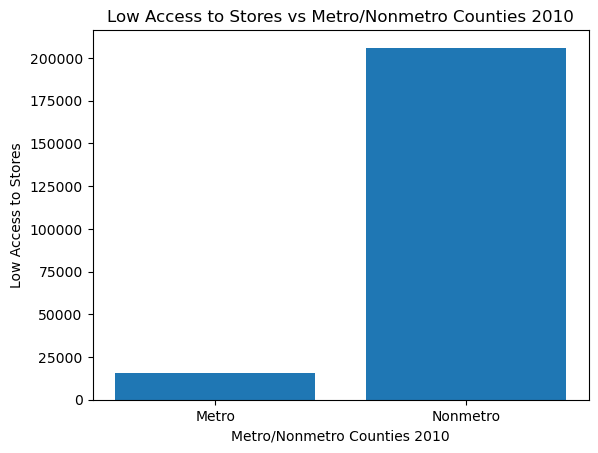

In [24]:
# Create a bar graph comparing low access 2015 vs.metro/nonmetro counties
x = regions_desert['METRO13']
y = regions_desert['LACCESS_POP10']
plt.bar(x, y)
plt.xlabel('Metro/Nonmetro Counties 2010')
plt.xticks([0, 1], ['Metro', 'Nonmetro'])
plt.ylabel('Low Access to Stores')
plt.title('Low Access to Stores vs Metro/Nonmetro Counties 2010')

plt.savefig('access_metro_nonmetro_2010', dpi=300, bbox_inches='tight')

plt.show()



Correlation coefficient for 65+ Year Population: -0.49
p-value: 1.39e-02
Correlation coefficient for under 18 years Population: 0.34
p-value: 9.70e-02


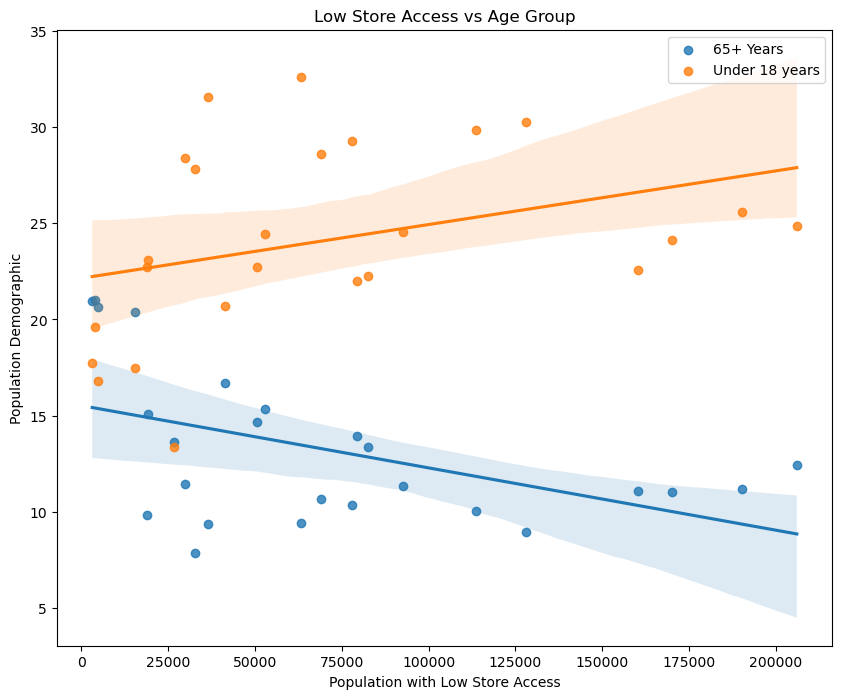

In [38]:

# Load data
socioeconomics_df = pd.read_csv('socioeconomics_df.csv')
access_df = pd.read_csv('access_df.csv')

# Merge data
merged_df = pd.merge(socioeconomics_df, access_df, on='County')
# Correlation Coefficients and Regression Line
x1 = merged_df["2010 Pop w/Low Store Access"]
y1 = merged_df["% Pop 65+ Years 2010"]
corr1, p_val1 = pearsonr(x1, y1)

x2 = merged_df["2010 Pop w/Low Store Access"]
y2 = merged_df["% Pop under 18 years 2010"]
corr2, p_val2 = pearsonr(x2, y2)

# Plot scatterplot
fig, ax = plt.subplots(figsize=(10,8))

sns.regplot(x="2010 Pop w/Low Store Access", y="% Pop 65+ Years 2010", data=merged_df, label='65+ Years')
sns.regplot(x="2010 Pop w/Low Store Access", y="% Pop under 18 years 2010", data=merged_df, label='Under 18 years')

ax.set_xlabel("Population with Low Store Access")
ax.set_ylabel("Population Demographic")
plt.title("Low Store Access vs Age Group")
plt.legend()

plt.savefig('scatterplot_65_vs_18_and_food_access_data_2010', dpi=300, bbox_inches='tight')

print("Correlation coefficient for 65+ Year Population: {:.2f}".format(corr1))
print("p-value: {:.2e}".format(p_val1))
print("Correlation coefficient for under 18 years Population: {:.2f}".format(corr2))
print("p-value: {:.2e}".format(p_val2))
plt.show()

Correlation coefficient for 65+ Year Population: -0.61
p-value: 1.13e-03
Correlation coefficient for under 18 years Population: 0.61
p-value: 1.25e-03


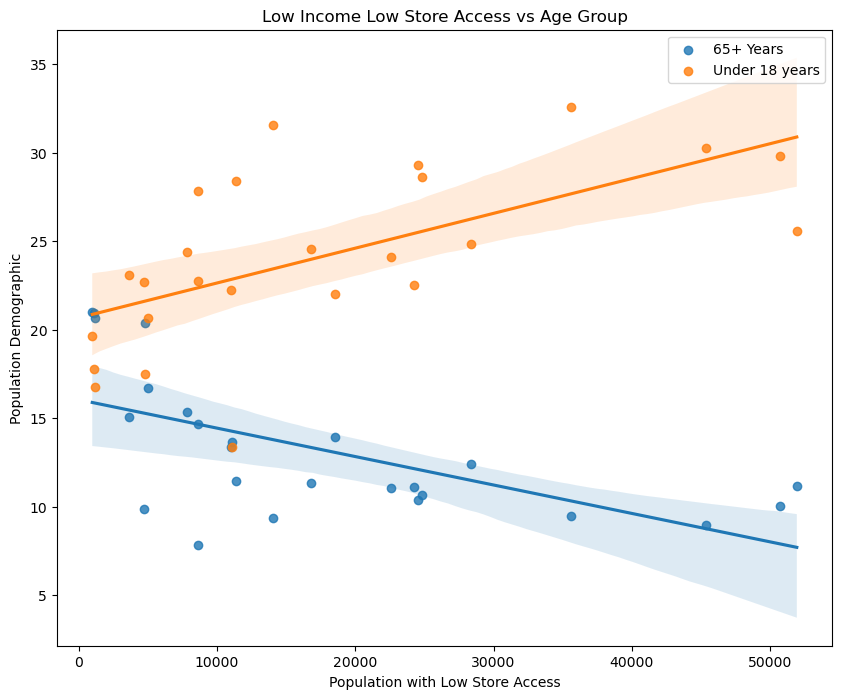

In [40]:
# Load data
socioeconomics_df = pd.read_csv('socioeconomics_df.csv')
access_df = pd.read_csv('access_df.csv')

# Merge data
merged_df = pd.merge(socioeconomics_df, access_df, on='County')

# Correlation Coefficients and Regression Line
x1 = merged_df["2010 Low Income Pop w/Low Store Access"]
y1 = merged_df["% Pop 65+ Years 2010"]
corr1, p_val1 = pearsonr(x1, y1)

x2 = merged_df["2010 Low Income Pop w/Low Store Access"]
y2 = merged_df["% Pop under 18 years 2010"]
corr2, p_val2 = pearsonr(x2, y2)

# Plot scatterplot
fig, ax = plt.subplots(figsize=(10,8))

sns.regplot(x="2010 Low Income Pop w/Low Store Access", y="% Pop 65+ Years 2010", data=merged_df, label='65+ Years')
sns.regplot(x="2010 Low Income Pop w/Low Store Access", y="% Pop under 18 years 2010", data=merged_df, label='Under 18 years')

ax.set_xlabel("Population with Low Store Access")
ax.set_ylabel("Population Demographic")
plt.title("Low Income Low Store Access vs Age Group")
plt.legend()

plt.savefig('scatterplot_65_vs_18_and_low_income_food_access_data_2010', dpi=300, bbox_inches='tight')
print("Correlation coefficient for 65+ Year Population: {:.2f}".format(corr1))
print("p-value: {:.2e}".format(p_val1))
print("Correlation coefficient for under 18 years Population: {:.2f}".format(corr2))
print("p-value: {:.2e}".format(p_val2))
plt.show()

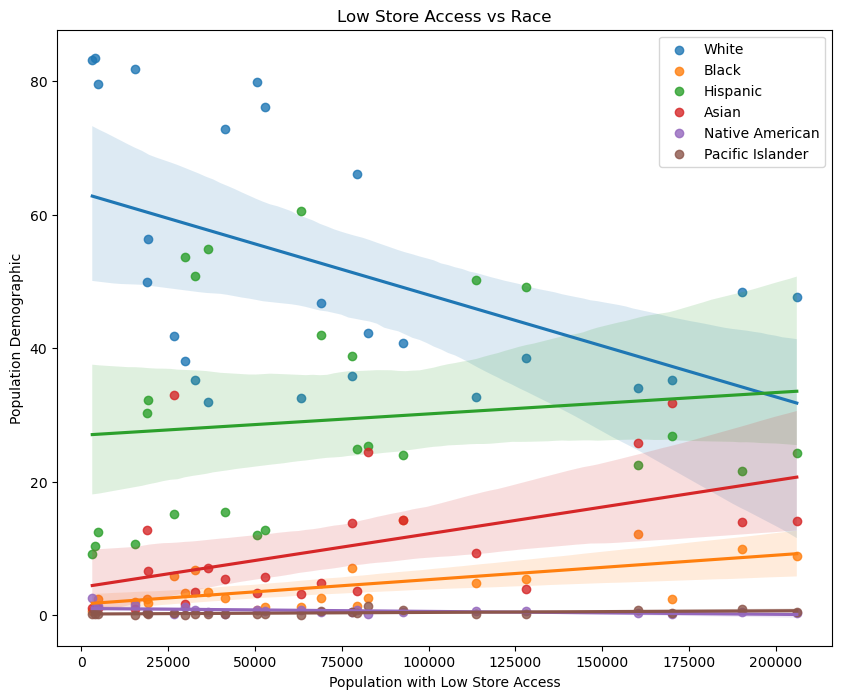

In [29]:

# Load data
socioeconomics_df = pd.read_csv('socioeconomics_df.csv')
access_df = pd.read_csv('access_df.csv')

# Merge data
merged_df = pd.merge(socioeconomics_df, access_df, on='County')

# Plot scatterplot
fig, ax = plt.subplots(figsize=(10,8))

sns.regplot(x="2010 Pop w/Low Store Access", y="% White 2010", data=merged_df, label='White')
sns.regplot(x="2010 Pop w/Low Store Access", y="% Black 2010", data=merged_df, label='Black')
sns.regplot(x="2010 Pop w/Low Store Access", y="% Hispanic 2010", data=merged_df, label='Hispanic')
sns.regplot(x="2010 Pop w/Low Store Access", y="% Asian 2010", data=merged_df, label='Asian')
sns.regplot(x="2010 Pop w/Low Store Access", y="% Native American 2010", data=merged_df, label='Native American')
sns.regplot(x="2010 Pop w/Low Store Access", y="% Pacific Islander 2010", data=merged_df, label='Pacific Islander')

ax.set_xlabel("Population with Low Store Access")
ax.set_ylabel("Population Demographic")
plt.title("Low Store Access vs Race")
plt.legend()

plt.savefig('scatterplot_race_and_food_access_data_2010', dpi=300, bbox_inches='tight')

plt.show()

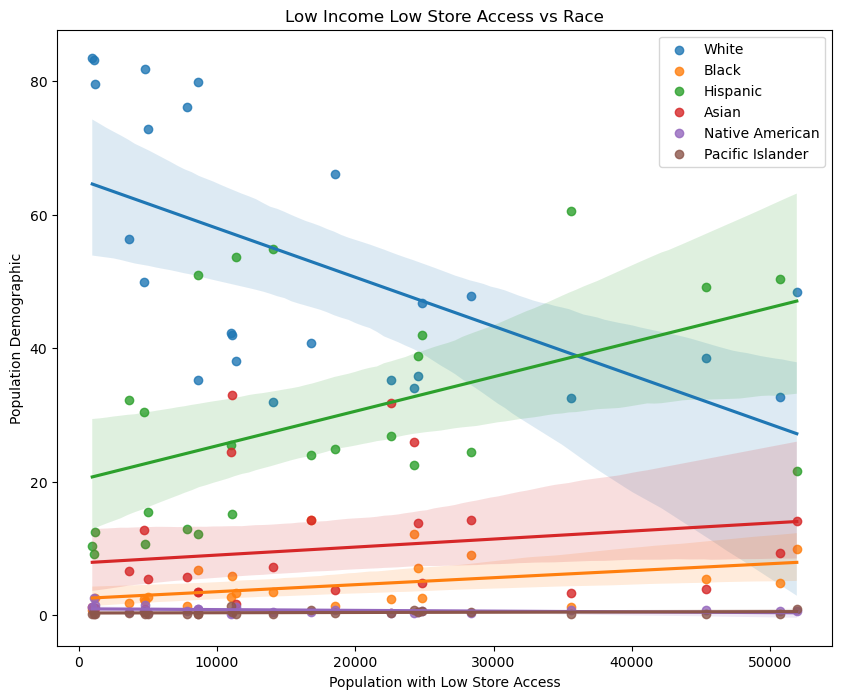

In [30]:
# Load data
socioeconomics_df = pd.read_csv('socioeconomics_df.csv')
access_df = pd.read_csv('access_df.csv')

# Merge data
merged_df = pd.merge(socioeconomics_df, access_df, on='County')

# Plot scatterplot
fig, ax = plt.subplots(figsize=(10,8))

sns.regplot(x="2010 Low Income Pop w/Low Store Access", y="% White 2010", data=merged_df, label='White')
sns.regplot(x="2010 Low Income Pop w/Low Store Access", y="% Black 2010", data=merged_df, label='Black')
sns.regplot(x="2010 Low Income Pop w/Low Store Access", y="% Hispanic 2010", data=merged_df, label='Hispanic')
sns.regplot(x="2010 Low Income Pop w/Low Store Access", y="% Asian 2010", data=merged_df, label='Asian')
sns.regplot(x="2010 Low Income Pop w/Low Store Access", y="% Native American 2010", data=merged_df, label='Native American')
sns.regplot(x="2010 Low Income Pop w/Low Store Access", y="% Pacific Islander 2010", data=merged_df, label='Pacific Islander')

ax.set_xlabel("Population with Low Store Access")
ax.set_ylabel("Population Demographic")
plt.title("Low Income Low Store Access vs Race")
plt.legend()

plt.savefig('scatterplot_race_and_low_income_food_access_data_2010', dpi=300, bbox_inches='tight')
plt.show()

Correlation coefficient for Median Household Income vs Diabetes: -0.34
p-value: 9.99e-02


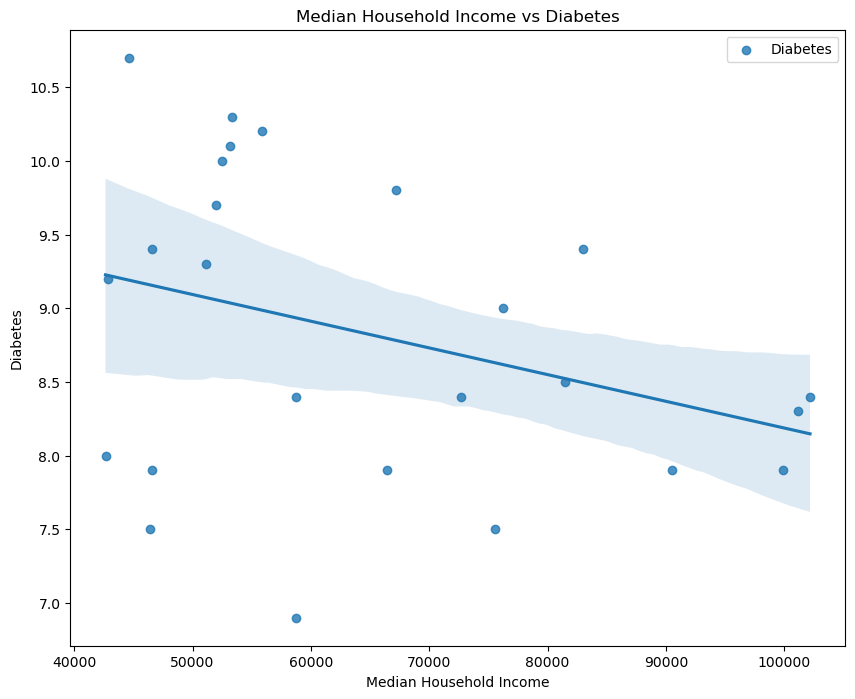

In [41]:
# Load data
socioeconomics_df = pd.read_csv('socioeconomics_df.csv')
health_data_df = pd.read_csv('health_data_df.csv')

# Merge data
merged_df = pd.merge(socioeconomics_df, health_data_df, on='County')

#Correlation and Regression Line
x1 = merged_df["Median Household Income 2015"]
y1 = merged_df["Diabetes 2013"]
corr1, p_val1 = pearsonr(x1, y1)

# Plot scatterplot
fig, ax = plt.subplots(figsize=(10,8))

sns.regplot(x="Median Household Income 2015", y="Diabetes 2013", data=merged_df, label='Diabetes')

ax.set_xlabel("Median Household Income")
ax.set_ylabel("Diabetes")
plt.title("Median Household Income vs Diabetes")
plt.legend()

plt.savefig('median_household_income_vs_diabetes', dpi=300, bbox_inches='tight')
print("Correlation coefficient for Median Household Income vs Diabetes: {:.2f}".format(corr1))
print("p-value: {:.2e}".format(p_val1))

plt.show()


Correlation coefficient for Low Income Low Access vs Diabetes: 0.35
p-value: 8.74e-02


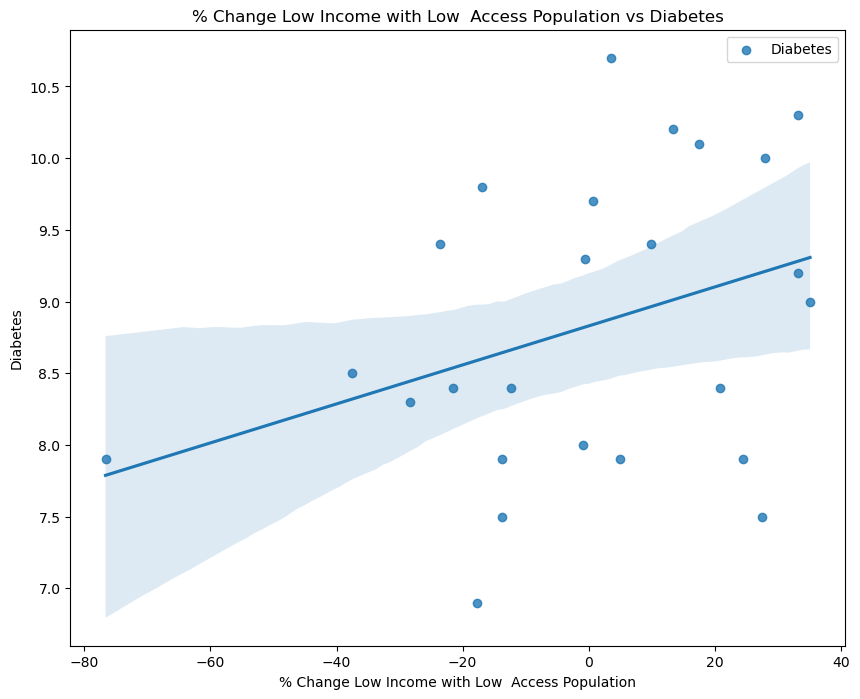

In [43]:
# Load data
access_df = pd.read_csv('access_df.csv')
health_data_df = pd.read_csv('health_data_df.csv')

# Merge data
merged_df = pd.merge(access_df, health_data_df, on='County')

#Correlation and Regression Line
x1 = merged_df["% Change 10-15 Low Income Pop w/Low Store Access"]
y1 = merged_df["Diabetes 2013"]
corr1, p_val1 = pearsonr(x1, y1)

# Plot scatterplot
fig, ax = plt.subplots(figsize=(10,8))

sns.regplot(x="% Change 10-15 Low Income Pop w/Low Store Access", y="Diabetes 2013", data=merged_df, label='Diabetes')

ax.set_xlabel("% Change Low Income with Low  Access Population")
ax.set_ylabel("Diabetes")
plt.title("% Change Low Income with Low  Access Population vs Diabetes")
plt.legend()

plt.savefig('low_income_low_access_vs_diabetes', dpi=300, bbox_inches='tight')
print("Correlation coefficient for Low Income Low Access vs Diabetes: {:.2f}".format(corr1))
print("p-value: {:.2e}".format(p_val1))

plt.show()
